In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_excel ('online_retail_II.xlsx')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Dataset Description**

- **InvoiceNo**: Invoice number. A unique number for each transaction. If it starts with 'C', it indicates a cancelled transaction.
- **StockCode**: Product code. A unique number for each product.
- **Description**: Product name.
- **Quantity**: Quantity of the product. Indicates how many units of the product were sold on the invoice.
- **InvoiceDate**: Invoice date and time.
- **UnitPrice**: Product price (in pounds).
- **CustomerID**: Unique customer number.
- **Country**: Country name. The country where the customer resides.tax

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
data.shape

(525461, 8)

In [10]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [11]:
data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

##here i can not drop all the missing customer id because it is 107927 row wich is soo big

In [13]:
data[data.isna().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


##there are some of missing customer id have a negative quantity wich is dont make secnce at all 


In [15]:
no_desc = data[data['Description'].isnull()]
no_desc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom


In [16]:
no_desc_and_zero_price  = no_desc['Price']== 0
no_desc_and_zero_price.shape

(2928,)

##so all the missing Description row in the data have also price equal to zero 
,which is also dose not make sence 

In [18]:
data = data.dropna(axis=0,how = 'any',subset=['Description'])

In [19]:
data.shape

(522533, 8)

In [20]:
data.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    104999
Country             0
dtype: int64

##so i stil have a missing ids on the data i will first analyz the invoice , because i found some invoices start with C , which this transaction is cancelled ,and i want to include only sucssesfull transaction 

In [22]:
cancelled = data[data['Invoice'].astype(str).str.startswith('C')]
cancelled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [23]:
data = data[~data['Invoice'].astype(str).str.startswith('C')]

In [24]:
data.shape

(512327, 8)

In [25]:
data.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    104632
Country             0
dtype: int64

##i found some quantity where still negative so after i grouped by customer id if there is still negative i while delet them

In [27]:
negative_quantity = data[data['Quantity'] < 0]
negative_quantity


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
3162,489660,35956,lost,-1043,2009-12-01 17:43:00,0.0,NaN,United Kingdom
3168,489663,35605A,damages,-117,2009-12-01 18:02:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
516202,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
524286,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom
524457,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom


In [28]:
negative_quantity.isna().sum()

Invoice          0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
Price            0
Customer ID    294
Country          0
dtype: int64

##all negative quantity are from null cutomer id wich it dose not make sence to keep them in my data 

In [30]:
data = data[data['Quantity'] > 0]
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [31]:
data.shape

(512033, 8)

In [32]:
data.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    104338
Country             0
dtype: int64

In [33]:
negative_price = data[data['Price'] < 0]
negative_price

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [34]:
a_invoices = data[data['Invoice'].astype(str).str.startswith('A')]
a_invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


##since i only have this 3 row with negative price and null id and also the invoice starts with A wich is not the usual , i will delet them

In [36]:
data = data[~data['Invoice'].astype(str).str.startswith('A')]

In [37]:
zero_price = data[data['Price'] == 0]
zero_price

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
5904,489861,DOT,DOTCOM POSTAGE,1,2009-12-02 14:50:00,0.0,NaN,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
517328,537534,20652,BLUE POLKADOT LUGGAGE TAG,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
517329,537534,20615,BLUE POLKADOT PASSPORT COVER,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
518589,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom
518595,537640,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2010-12-07 15:31:00,0.0,NaN,United Kingdom


In [38]:
zero_price.isna().sum()

Invoice          0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
Price            0
Customer ID    434
Country          0
dtype: int64

#i want to remove rows where price equal zero and also id is null , not where i have id because where i have id i can see this customer total price and it may be greater than zero and this may idicat he got this product as a gift or somthis or buy one get one free

In [40]:
df = data[~((data['Price'] == 0) & (data['Customer ID'].isnull()))]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [41]:
zero_price2 = df[df['Price'] == 0]
zero_price2.shape

(31, 8)

##if i grouped by id and sum the price and the price is still zero then i will delet this 31 records

In [43]:
df.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103901
Country             0
dtype: int64

In [44]:
d = data.duplicated().sum()
d

6841

In [45]:
df[df.duplicated()]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


In [46]:
data[data.duplicated(keep=False)].sort_values(by=list(data.columns))


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525292,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom
525330,538168,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,5,2010-12-09 19:23:00,1.65,14702.0,United Kingdom


In [47]:
df_raw = df.copy()
df = df.drop_duplicates().reset_index(drop=True)


In [48]:
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [49]:
df.shape

(504761, 8)

In [50]:
df_raw.shape

(511596, 8)

In [51]:
df.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103814
Country             0
dtype: int64

In [52]:
##so since i have a very big number of missing values in id i will not delet them i will fill them with invoice number since its uniqe

In [53]:
df['Customer ID'] = df['Customer ID'].fillna(df['Invoice'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
504756,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
504757,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
504758,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
504759,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [54]:
# Step 1: Create a new column for total money spent per row
df['TotalPrice'] = df['Quantity'] * df['Price']
grouped = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',         # number of invoices (frequency)
    'Quantity': 'sum',            # total quantity
    'TotalPrice': 'sum',          # total money spent
    'InvoiceDate': 'max',         # last purchase date
    'Country': 'first',           # or use mode, if consistent
    'Description': 'count'        # total line items
}).reset_index()
grouped

,Customer ID,Invoice,Quantity,TotalPrice,InvoiceDate,Country,Description
0,12346.0,11,70,372.86,2010-06-28 13:53:00,United Kingdom,33
1,12347.0,2,828,1323.32,2010-12-07 14:57:00,Iceland,71
2,12348.0,1,373,222.16,2010-09-27 14:59:00,Finland,20
3,12349.0,3,993,2671.14,2010-10-28 08:23:00,Italy,102
4,12351.0,1,261,300.93,2010-11-29 15:23:00,Unspecified,21
...,...,...,...,...,...,...,...
6047,538127.0,1,2,7.50,2010-12-09 15:53:00,United Kingdom,2
6048,538148.0,1,225,2215.27,2010-12-09 16:26:00,United Kingdom,111
6049,538149.0,1,239,2446.16,2010-12-09 16:27:00,United Kingdom,113
6050,538153.0,1,353,3091.82,2010-12-09 16:31:00,United Kingdom,121


In [55]:
grouped2 = df_raw.groupby('Customer ID').agg({
    'Invoice': 'nunique',         # number of invoices (frequency)
    'Quantity': 'sum',            # total quantity
    'Price': 'sum',          # total money spent
    'InvoiceDate': 'max',         # last purchase date
    'Country': 'first',           # or use mode, if consistent
    'Description': 'count'        # total line items
}).reset_index()
grouped2

,Customer ID,Invoice,Quantity,Price,InvoiceDate,Country,Description
0,12346.0,11,70,206.36,2010-06-28 13:53:00,United Kingdom,33
1,12347.0,2,828,162.95,2010-12-07 14:57:00,Iceland,71
2,12348.0,1,373,14.39,2010-09-27 14:59:00,Finland,20
3,12349.0,3,993,875.34,2010-10-28 08:23:00,Italy,102
4,12351.0,1,261,49.46,2010-11-29 15:23:00,Unspecified,21
...,...,...,...,...,...,...,...
4309,18283.0,6,336,498.82,2010-11-22 15:30:00,United Kingdom,230
4310,18284.0,1,494,91.09,2010-10-04 11:33:00,United Kingdom,28
4311,18285.0,1,145,100.20,2010-02-17 10:24:00,United Kingdom,12
4312,18286.0,2,608,286.30,2010-08-20 11:57:00,United Kingdom,67


##i decide to analyz the recency by shownig of if the number of active people are increase or decreas over time 

In [57]:
recency = pd.DataFrame(columns = ['customerId','lastPurchaseDate'])

In [58]:
recency['customerId'] = grouped['Customer ID']
recency['lastPurchaseDate'] = grouped['InvoiceDate'].dt.date
recency

,customerId,lastPurchaseDate
0,12346.0,2010-06-28
1,12347.0,2010-12-07
2,12348.0,2010-09-27
3,12349.0,2010-10-28
4,12351.0,2010-11-29
...,...,...
6047,538127.0,2010-12-09
6048,538148.0,2010-12-09
6049,538149.0,2010-12-09
6050,538153.0,2010-12-09


In [59]:
recency.groupby('lastPurchaseDate')['customerId'].count().reset_index()

,lastPurchaseDate,customerId
0,2009-12-01,28
1,2009-12-02,14
2,2009-12-03,10
3,2009-12-04,15
4,2009-12-05,1
...,...,...
302,2010-12-05,63
303,2010-12-06,82
304,2010-12-07,74
305,2010-12-08,102


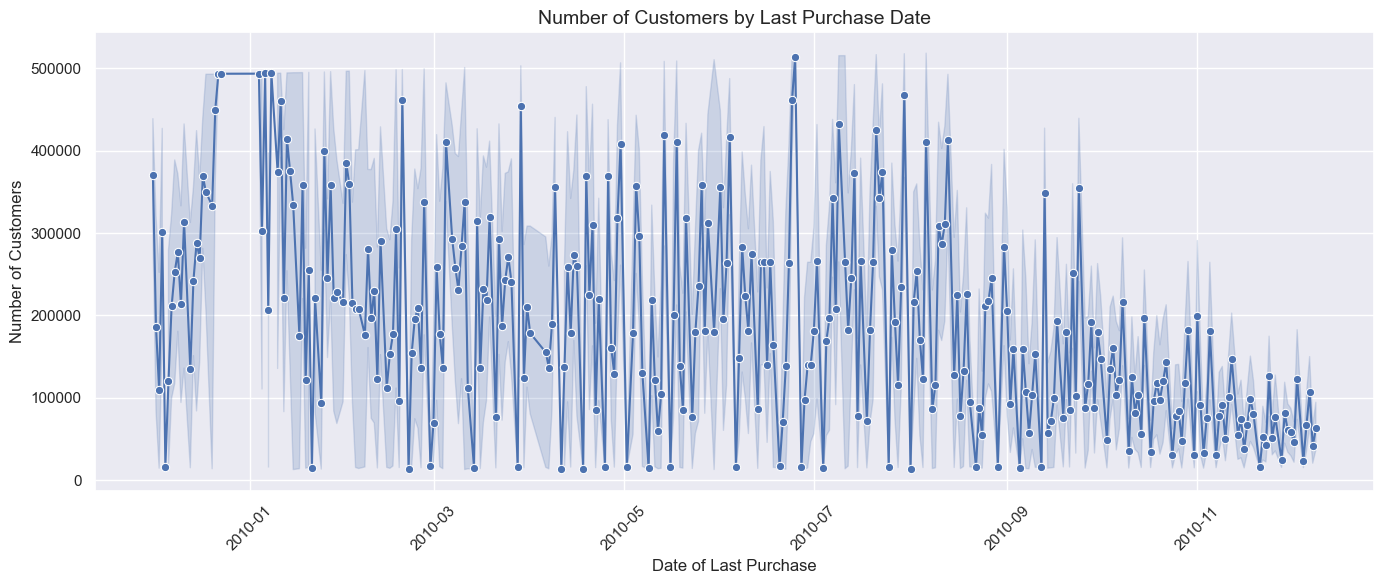

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=recency, x='lastPurchaseDate', y='customerId', marker='o')

plt.title('Number of Customers by Last Purchase Date', fontsize=14)
plt.xlabel('Date of Last Purchase')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
monthly__trend = pd.DataFrame(columns = ['customerId','lastPurchaseDate'])

In [62]:
monthly__trend['customerId'] = grouped['Customer ID']
monthly__trend['lastPurchaseDate'] = grouped['InvoiceDate']
monthly__trend

,customerId,lastPurchaseDate
0,12346.0,2010-06-28 13:53:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12351.0,2010-11-29 15:23:00
...,...,...
6047,538127.0,2010-12-09 15:53:00
6048,538148.0,2010-12-09 16:26:00
6049,538149.0,2010-12-09 16:27:00
6050,538153.0,2010-12-09 16:31:00


In [63]:
monthly__trend['lastPurchaseDate'] = pd.to_datetime(monthly__trend['lastPurchaseDate'])
monthly__trend['Month'] = monthly__trend['lastPurchaseDate'].dt.to_period('M')

In [64]:
monthly_counts = monthly__trend.groupby('Month')['customerId'].count().reset_index()
monthly_counts.columns = ['Month', 'CustomerCount']
monthly_counts['Month'] = monthly_counts['Month'].astype(str)
monthly_counts

,Month,CustomerCount
0,2009-12,283
1,2010-01,165
2,2010-02,199
3,2010-03,317
4,2010-04,279
5,2010-05,282
6,2010-06,337
7,2010-07,315
8,2010-08,353
9,2010-09,552


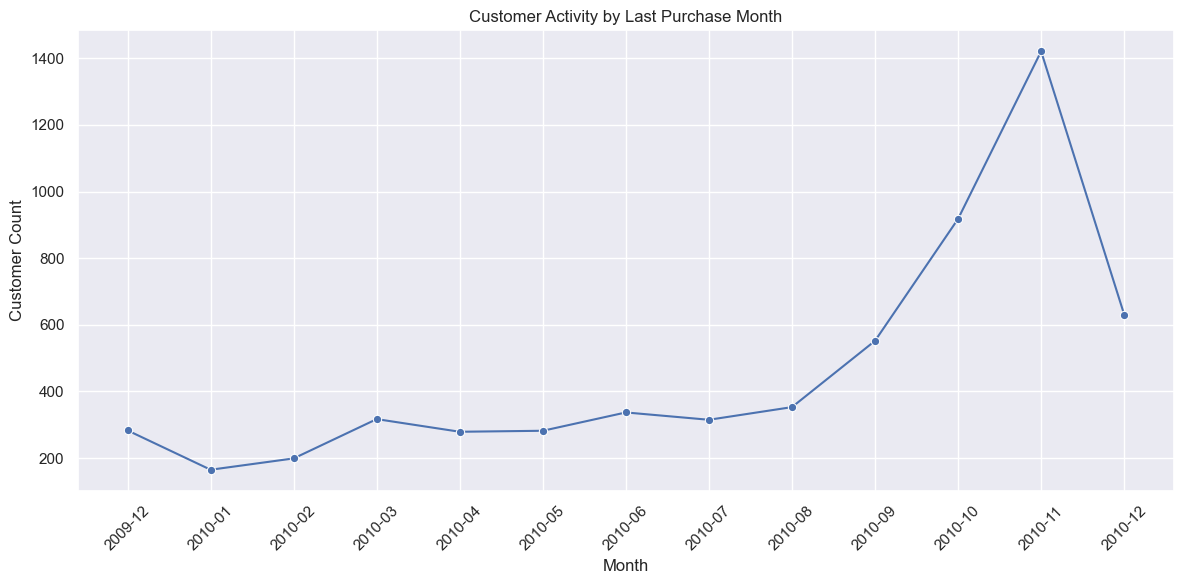

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month', y='CustomerCount', marker='o')
plt.title('Customer Activity by Last Purchase Month')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The number of active people is reach the max at november 2010 

In [67]:
grouped

,Customer ID,Invoice,Quantity,TotalPrice,InvoiceDate,Country,Description
0,12346.0,11,70,372.86,2010-06-28 13:53:00,United Kingdom,33
1,12347.0,2,828,1323.32,2010-12-07 14:57:00,Iceland,71
2,12348.0,1,373,222.16,2010-09-27 14:59:00,Finland,20
3,12349.0,3,993,2671.14,2010-10-28 08:23:00,Italy,102
4,12351.0,1,261,300.93,2010-11-29 15:23:00,Unspecified,21
...,...,...,...,...,...,...,...
6047,538127.0,1,2,7.50,2010-12-09 15:53:00,United Kingdom,2
6048,538148.0,1,225,2215.27,2010-12-09 16:26:00,United Kingdom,111
6049,538149.0,1,239,2446.16,2010-12-09 16:27:00,United Kingdom,113
6050,538153.0,1,353,3091.82,2010-12-09 16:31:00,United Kingdom,121


In [68]:
grouped.sort_values(by = ['TotalPrice'], ascending = True)

,Customer ID,Invoice,Quantity,TotalPrice,InvoiceDate,Country,Description
1233,14103.0,1,5,0.00,2010-02-12 14:58:00,United Kingdom,1
1775,14827.0,1,5,0.00,2010-02-12 15:47:00,United Kingdom,1
5781,528127.0,1,1,0.19,2010-10-20 14:42:00,United Kingdom,1
5829,529767.0,1,2,0.42,2010-10-29 15:04:00,United Kingdom,1
5443,518991.0,1,1,0.42,2010-08-12 17:30:00,United Kingdom,1
...,...,...,...,...,...,...,...
939,13694.0,94,125893,131443.19,2010-12-01 12:12:00,United Kingdom,957
1842,14911.0,205,69709,152121.22,2010-12-09 12:17:00,EIRE,5568
1270,14156.0,102,108105,196549.74,2010-12-03 11:48:00,EIRE,2646
1638,14646.0,78,170342,248396.50,2010-11-30 16:28:00,Netherlands,1774


In [69]:
zero_price_count = (grouped['TotalPrice'] == 0).sum()
print(f"Number of rows with Price = 0: {zero_price_count}")

Number of rows with Price = 0: 2


In [70]:
# View rows where TotalPrice is exactly zero
zero_price_rows = grouped[grouped['TotalPrice'] == 0]
zero_price_rows

,Customer ID,Invoice,Quantity,TotalPrice,InvoiceDate,Country,Description
1233,14103.0,1,5,0.0,2010-02-12 14:58:00,United Kingdom,1
1775,14827.0,1,5,0.0,2010-02-12 15:47:00,United Kingdom,1


#it dose not make any since to have a customer hwo did not pay anything and he acctualy buy some stuff

In [72]:
df = df[df['TotalPrice'] > 0]

In [73]:
# Ensure it's in datetime format
grouped['InvoiceDate'] = pd.to_datetime(grouped['InvoiceDate'])

# Define the date to compare against (latest date in dataset or today)
reference_date = grouped['InvoiceDate'].max()  # or use pd.Timestamp.today()

# Calculate Recency
grouped['Recency'] = (reference_date - grouped['InvoiceDate']).dt.days

In [74]:
segment = pd.DataFrame(columns = ['id','price','orders','Recency'])
segment['id'] = grouped['Customer ID'] 
segment['price'] = grouped['TotalPrice'] 
segment['orders'] = grouped['Invoice'] 
segment['Recency'] = grouped['Recency'] 
segment.sort_values(by='price', ascending=True)

,id,price,orders,Recency
1233,14103.0,0.00,1,300
1775,14827.0,0.00,1,300
5781,528127.0,0.19,1,50
5829,529767.0,0.42,1,41
5443,518991.0,0.42,1,119
...,...,...,...,...
939,13694.0,131443.19,94,8
1842,14911.0,152121.22,205,0
1270,14156.0,196549.74,102,6
1638,14646.0,248396.50,78,9


In [75]:
segment.isna().sum()

id         0
price      0
orders     0
Recency    0
dtype: int64

In [76]:
zero_price_customers = segment[segment['price'] == 0]
print(zero_price_customers)

           id  price  orders  Recency
1233  14103.0    0.0       1      300
1775  14827.0    0.0       1      300


In [203]:
segment = segment[['Recency', 'orders', 'price']]

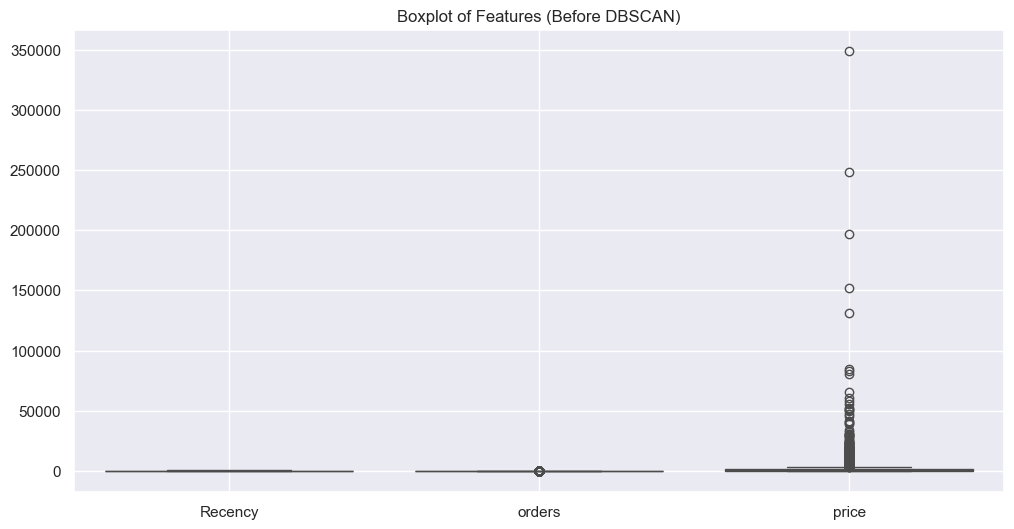

In [207]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=segment)
plt.title("Boxplot of Features")
plt.grid(True)
plt.show()


 i will use DBSCAN because i have outliers 

just to make sure that is every things is clean and good for next step (un-supervised learning)

In [217]:
segment.isna().sum()

Recency    0
orders     0
price      0
dtype: int64

In [328]:
db_data = pd.DataFrame(columns = ['price','orders','recency']) 
db_data['price'] = grouped['TotalPrice'] 
db_data['orders'] = grouped['Invoice'] 
db_data['recency'] = grouped['Recency']

db_data.sort_values(by='price', ascending=True)

,price,orders,recency
1233,0.00,1,300
1775,0.00,1,300
5781,0.19,1,50
5829,0.42,1,41
5443,0.42,1,119
...,...,...,...
939,131443.19,94,8
1842,152121.22,205,0
1270,196549.74,102,6
1638,248396.50,78,9


In [330]:
# Keep only rows where price is greater than 0
db_data = db_data[db_data['price'] > 0]

In [332]:
db_data.sort_values(by='price', ascending=True)

,price,orders,recency
5781,0.19,1,50
4789,0.42,1,258
4994,0.42,1,216
5829,0.42,1,41
5443,0.42,1,119
...,...,...,...
939,131443.19,94,8
1842,152121.22,205,0
1270,196549.74,102,6
1638,248396.50,78,9


In [334]:
db_data

,price,orders,recency
0,372.86,11,164
1,1323.32,2,2
2,222.16,1,73
3,2671.14,3,42
4,300.93,1,10
...,...,...,...
6047,7.50,1,0
6048,2215.27,1,0
6049,2446.16,1,0
6050,3091.82,1,0


In [336]:

from sklearn.preprocessing import RobustScaler
scaled = RobustScaler()
scaled = scaled.fit_transform(db_data)
#i use this instate of StandardScaler because the robustScaler use the median instate of the mean and its good for the outlier 
#it use this formula             X_scaled = (X - median) / IQR
#and standardScaler use this     X_scaled = (X - mean) / std





In [338]:
scaled.shape

(6050, 3)

In [340]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5,min_samples=10)

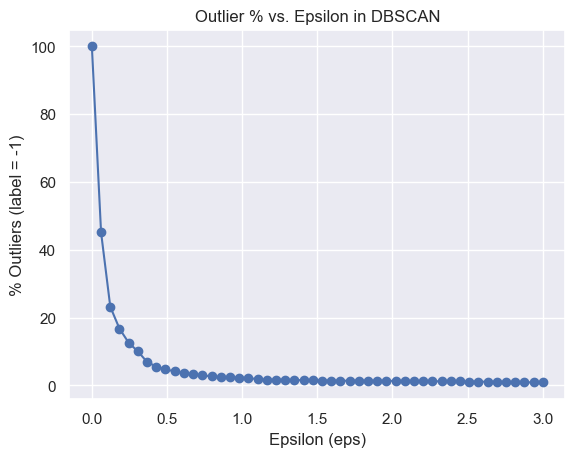

In [342]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

outlier_percent = []

# Try different eps values from 0.001 to 3
for eps in np.linspace(0.001, 3, 50):
    dbscan = DBSCAN(eps=eps, min_samples=10)  # <-- use eps from the loop
    dbscan.fit(scaled)  # 'scaled' is your standardized data
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

# Plot results
plt.plot(np.linspace(0.001, 3, 50), outlier_percent, marker='o')
plt.xlabel('Epsilon (eps)')
plt.ylabel('% Outliers (label = -1)')
plt.title('Outlier % vs. Epsilon in DBSCAN')
plt.grid(True)
plt.show()


In [344]:
labels = model.fit_predict(scaled)
labels

array([-1,  0,  0, ...,  0,  0,  0], dtype=int64)

In [345]:
scaled_db = pd.DataFrame(scaled, columns=['Recency', 'orders', 'price'])

# Add the cluster labels
scaled_db['Target'] = labels

In [346]:
scaled_db['Target'].value_counts()
#the data is un_balanced


Target
 0    5724
-1     275
 2      30
 3      11
 1      10
Name: count, dtype: int64

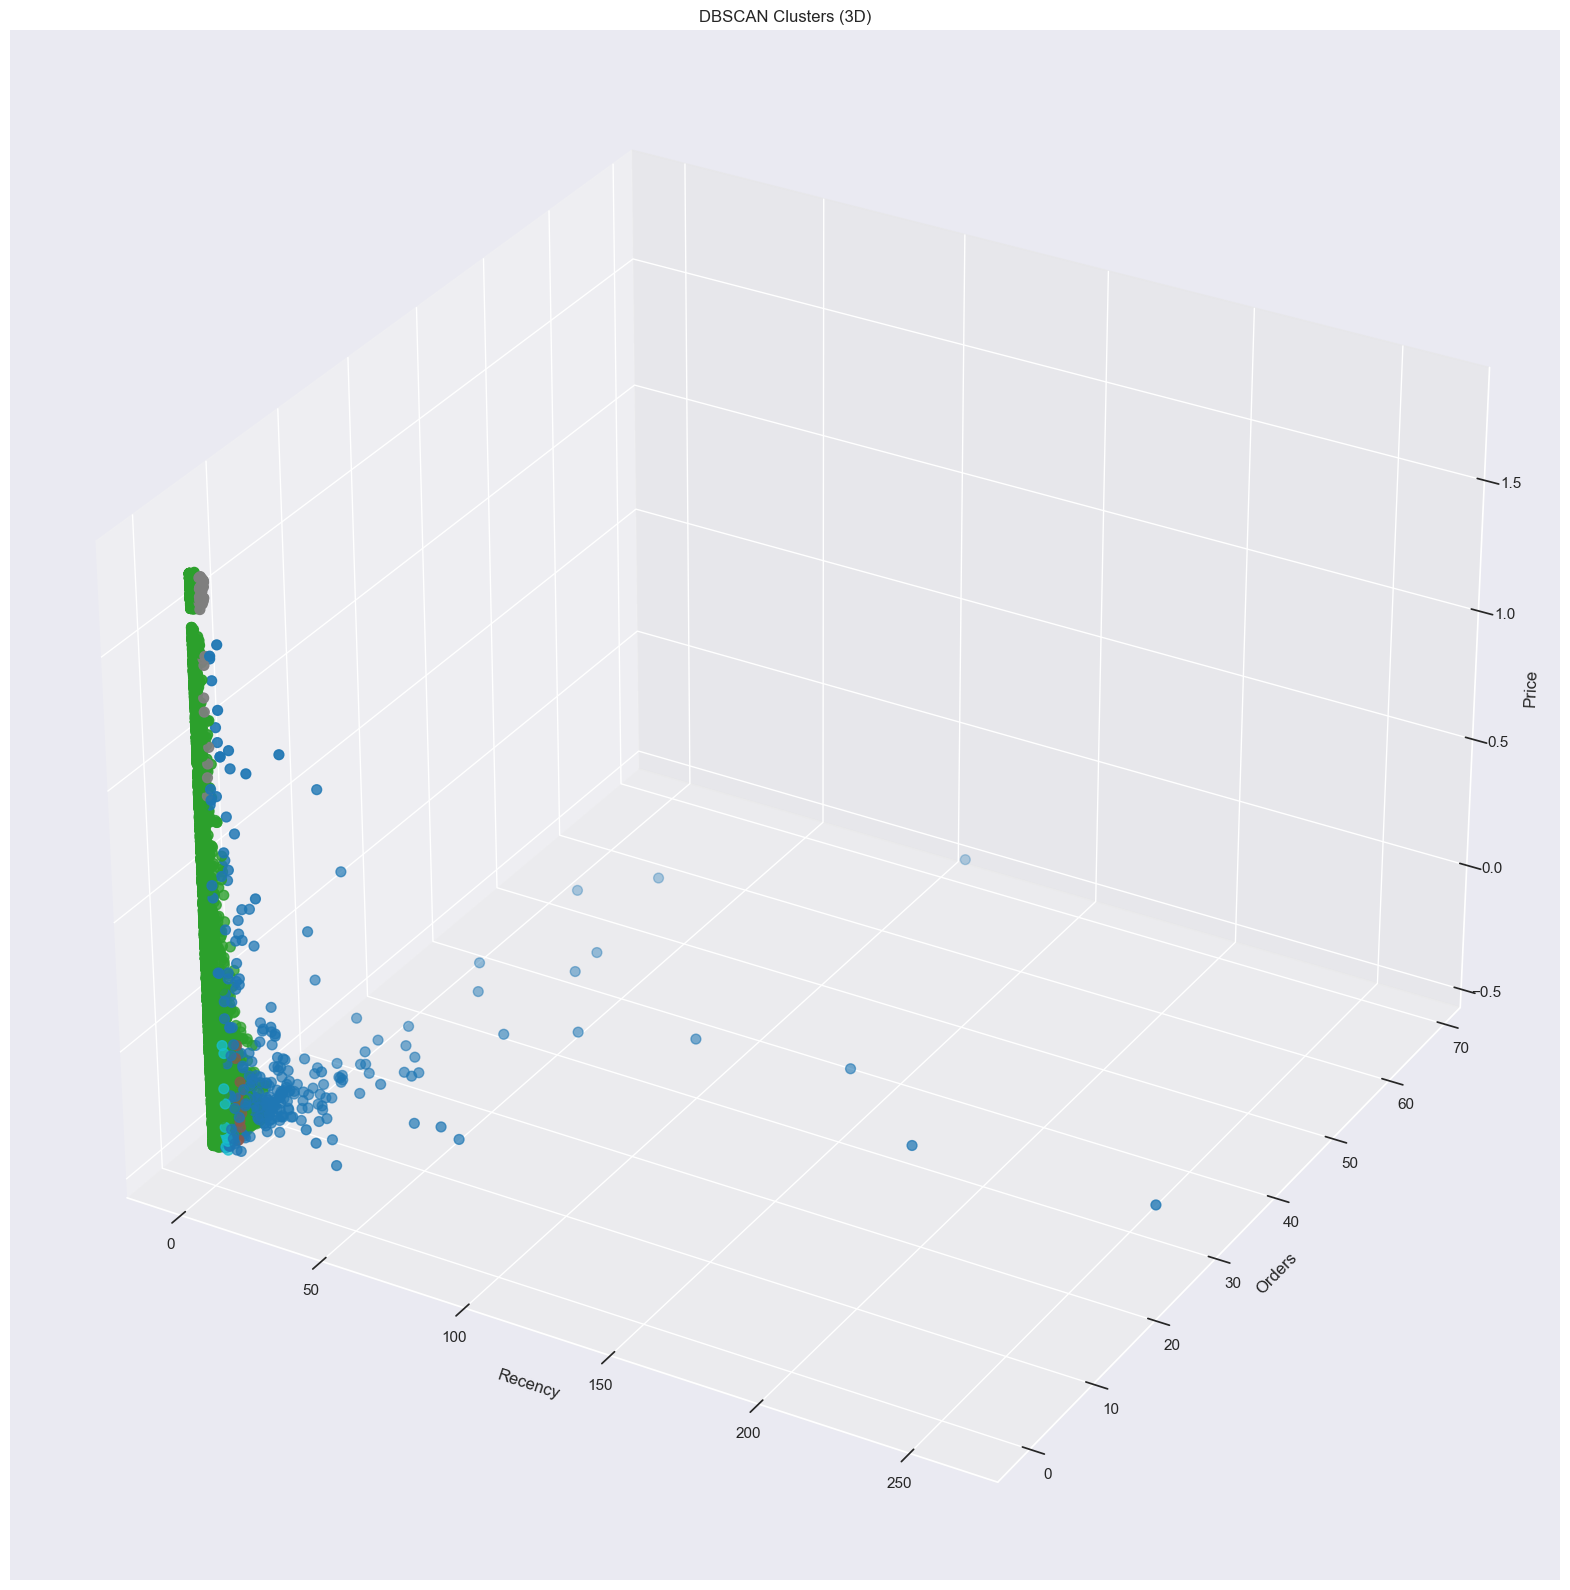

In [347]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 90))
ax = fig.add_subplot(111, projection='3d')

# Assign colors by cluster
colors = scaled_db['Target']

# 3D scatter
ax.scatter(
    scaled_db['Recency'],
    scaled_db['orders'],
    scaled_db['price'],
    c=colors,
    cmap='tab10',  # Change to 'Set1', 'Set2', etc.
    s=50
)

ax.set_xlabel('Recency')
ax.set_ylabel('Orders')
ax.set_zlabel('Price')
ax.set_title('DBSCAN Clusters (3D)')
plt.show()


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define your features and target
X = scaled_db[['Recency', 'orders', 'price']]
y = scaled_db['Target']


# # Step 2: Apply SMOTETomek to training data
# smt = SMOTETomek(random_state=42)
# X_train_balanced, y_train_balanced = smt.fit_resample(X, y)


# Apply SMOTE to training data
smt = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(X, y)


# Step 3: Train-test split (with stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.2, random_state=12
)


# Optional: Check class distribution after SMOTETomek
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())

# Step 4: Train your SVM model on balanced data
model = SVC(kernel='rbf', C=1, probability=True)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate on original test set
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class distribution after SMOTETomek:
Target
 1    5724
 2    5724
 3    5724
-1    5723
 0    5723
Name: count, dtype: int64

Confusion Matrix:
[[ 947   16  107   23   33]
 [  22 1129    2    3    4]
 [   0    0 1158    0    0]
 [   0    0    0 1130    0]
 [   0    0    0    0 1150]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.84      0.90      1126
           0       0.99      0.97      0.98      1160
           1       0.91      1.00      0.96      1158
           2       0.98      1.00      0.99      1130
           3       0.97      1.00      0.98      1150

    accuracy                           0.96      5724
   macro avg       0.96      0.96      0.96      5724
weighted avg       0.96      0.96      0.96      5724



In [349]:
scaled_db.groupby('Target')[['Recency', 'orders', 'price']].mean().round(2)

,Recency,orders,price
Target,,,
-1,12.10,6.77,-0.14
0,0.30,0.54,0.27
1,5.00,1.73,-0.27
2,3.43,0.00,1.57
3,4.62,0.00,-0.28


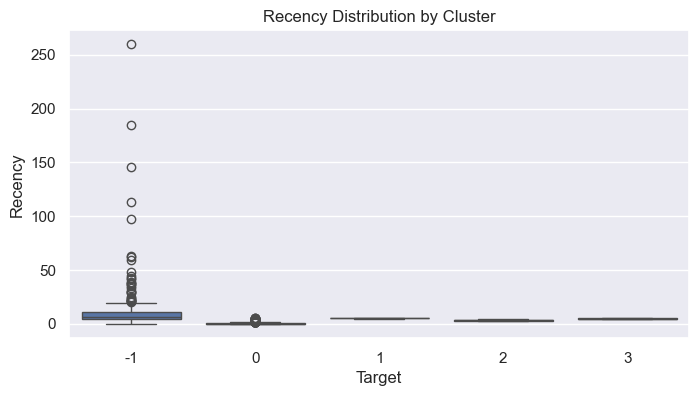

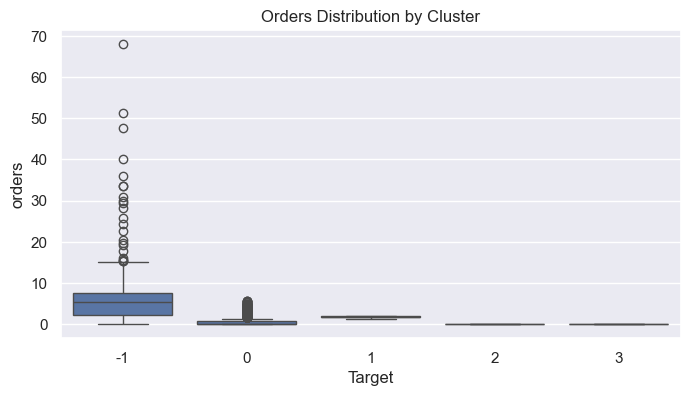

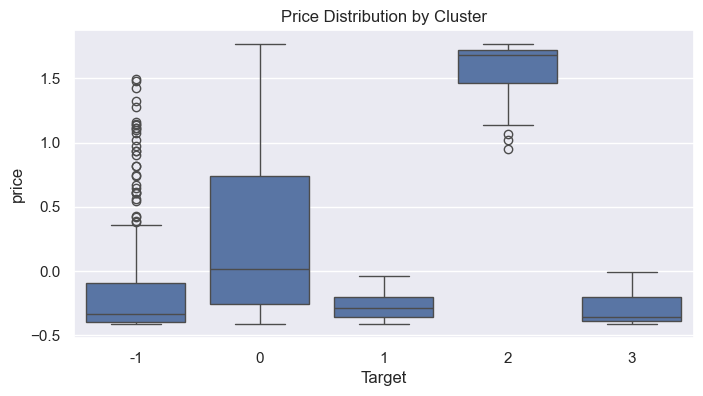

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Recency', 'orders', 'price']
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=scaled_db, x='Target', y=col)
    plt.title(f"{col.title()} Distribution by Cluster")
    plt.show()


In [360]:
scaled_db.groupby('Target')[['Recency', 'orders', 'price']].mean().round(2)

,Recency,orders,price
Target,,,
-1,12.10,6.77,-0.14
0,0.30,0.54,0.27
1,5.00,1.73,-0.27
2,3.43,0.00,1.57
3,4.62,0.00,-0.28


Recency: Lower = more recent = better

Orders: More = loyal / engaged

Price: Higher = high-spending

In [366]:
# Use your unscaled data and add the DBSCAN labels
db_data['Target'] = labels  # assuming `labels` is from DBSCAN

# Group by cluster and get means
cluster_summary = db_data.groupby('Target').mean().round(2)
print(cluster_summary)


           price  orders  recency
Target                           
-1      16771.84   21.30    47.19
 0        936.22    2.62   117.54
 1       7237.97    6.20    25.50
 2       5137.73    1.00   339.03
 3       6731.94    1.00    22.82


cluster -1 indicate the outliers , 	High spend, frequent, recent-ish people

cluster 0 indicate Low spend, low orders, long ago

cluster 1 indicate High spend, moderate orders, very recent

cluster 2 indicate Single order, moderate spend, very old 

cluster 3 indicate Single order, high spend, very recent

In [376]:
label_map = {
    -1: 'VIP Customers',
     0: 'Churned Low Spenders',
     1: 'Engaged High Spenders',
     2: 'Lost One-Time Buyers',
     3: 'New High-Value Buyers'
}

db_data['Segment_Label'] = db_data['Target'].map(label_map)
db_data

,price,orders,recency,Target,Segment_Label
0,372.86,11,164,-1,VIP Customers
1,1323.32,2,2,0,Churned Low Spenders
2,222.16,1,73,0,Churned Low Spenders
3,2671.14,3,42,0,Churned Low Spenders
4,300.93,1,10,0,Churned Low Spenders
...,...,...,...,...,...
6047,7.50,1,0,0,Churned Low Spenders
6048,2215.27,1,0,0,Churned Low Spenders
6049,2446.16,1,0,0,Churned Low Spenders
6050,3091.82,1,0,0,Churned Low Spenders
